# Machine Failure Data Analysis

This notebook analyzes the machine failure dataset to predict machine failures based on various sensor readings. It includes Exploratory Data Analysis (EDA), data preprocessing, model training, and evaluation.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# Set plot style
sns.set(style="whitegrid")

## 1. Load Data

Load the dataset and identify the columns.

In [4]:
df = pd.read_csv('machine_failure_data.csv')
df.head()

,UDI,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure
0,1,M,298.1,323.740741,1551,42.8,0,0
1,2,L,298.2,324.111111,1408,46.3,3,0
2,3,L,298.1,323.370370,1498,49.4,5,0
3,4,L,298.2,323.740741,1433,39.5,7,0
4,5,L,298.2,324.111111,1408,40.0,9,0


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UDI                  10000 non-null  int64  
 1   Type                 10000 non-null  str    
 2   Air temperature      10000 non-null  float64
 3   Process temperature  10000 non-null  float64
 4   Rotational speed     10000 non-null  int64  
 5   Torque               10000 non-null  float64
 6   Tool wear            10000 non-null  int64  
 7   Failure              10000 non-null  int64  
dtypes: float64(3), int64(4), str(1)
memory usage: 625.1 KB


In [6]:
df.describe()

,UDI,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,328.946519,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,5.495312,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,313.000000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,324.481481,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,329.296296,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,333.000000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,343.000000,2886.000000,76.600000,253.000000,1.000000


## 2. Exploratory Data Analysis (EDA)

Analyze the distribution of the target variable and features.

### Target Distribution (Failure)

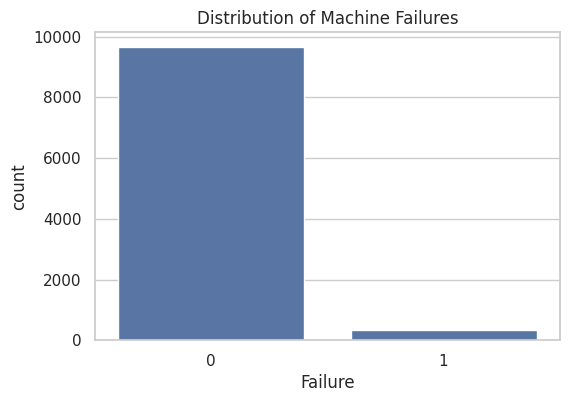

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Failure', data=df)
plt.title('Distribution of Machine Failures')
plt.show()

### Numerical Features Distribution

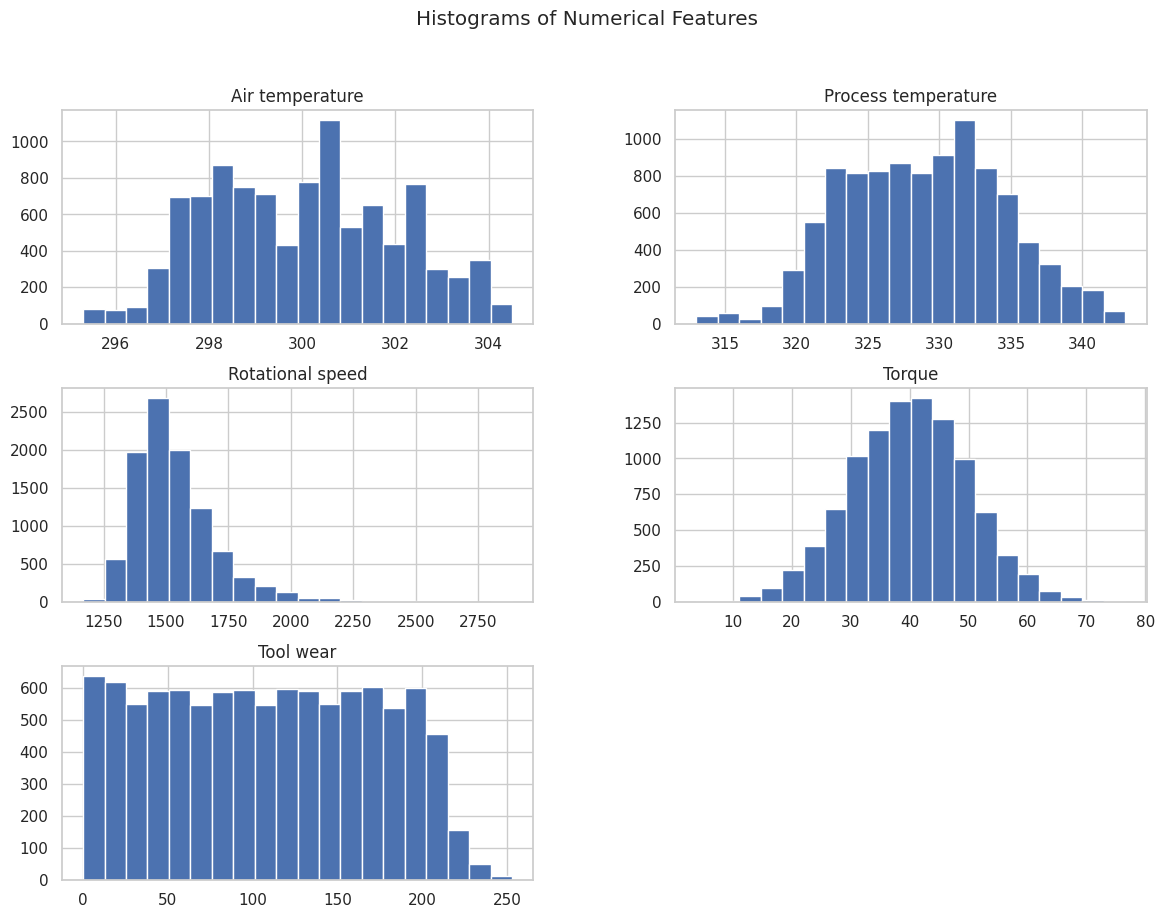

In [8]:
numerical_features = ['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear']
df[numerical_features].hist(bins=20, figsize=(14, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

### Categorical Feature (Type)

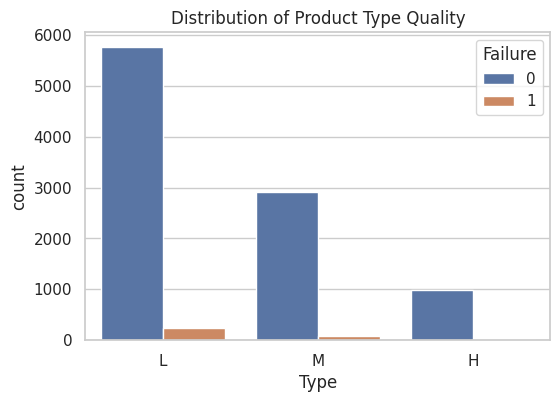

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Type', data=df, hue='Failure', order=['L', 'M', 'H'])
plt.title('Distribution of Product Type Quality')
plt.show()

### Correlation Heatmap

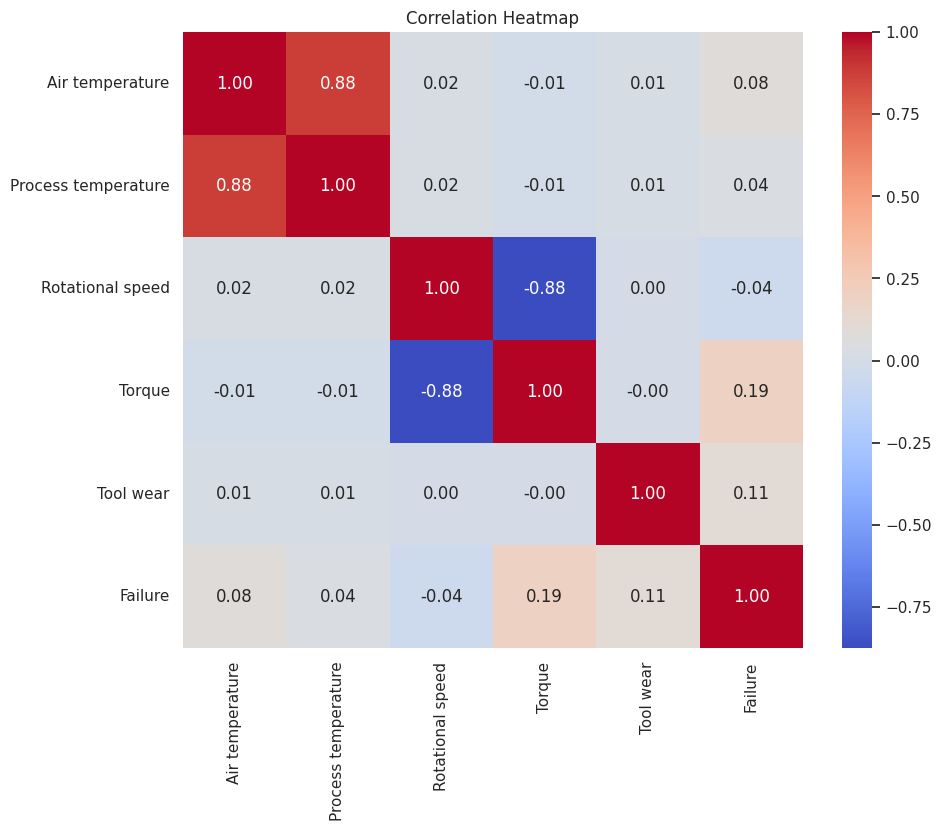

In [10]:
plt.figure(figsize=(10, 8))
corr = df[numerical_features + ['Failure']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## 3. Preprocessing

Clean the data and prepare it for modeling.
1. Drop unnecessary columns: `UDI`.
2. Encode categorical variables: `Type`.

In [11]:
# Drop ID column
df_clean = df.drop(columns=['UDI'])

# Encode 'Type' column explicitly to preserve ordinality
df_clean["Type"] = LabelEncoder().fit_transform(df_clean["Type"])

df_clean.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure
0,2,298.1,323.740741,1551,42.8,0,0
1,1,298.2,324.111111,1408,46.3,3,0
2,1,298.1,323.370370,1498,49.4,5,0
3,1,298.2,323.740741,1433,39.5,7,0
4,1,298.2,324.111111,1408,40.0,9,0


## 4. Data Splitting

Split the data into Training (70%), Validation (15%), and Test (15%) sets.

In [12]:
X = df_clean.drop('Failure', axis=1)
y = df_clean['Failure']

# First split: 70% Train, 30% Temp (Test + Validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Second split: Split Temp into 50% Validation, 50% Test (which is 15% and 15% of total)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (7000, 6)
Validation set shape: (1500, 6)
Test set shape: (1500, 6)


## 5. Model Training & Evaluation

Train a Random Forest Classifier and evaluate its performance on the Validation and Test sets.

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

/root/Projects/itc/week_02/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Training Metrics

In [14]:
print("Training Metrics:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"F1 Score: {f1_score(y_train, y_train_pred):.4f}")
print(f"Precision: {precision_score(y_train, y_train_pred):.4f}")
print(f"Recall: {recall_score(y_train, y_train_pred):.4f}")

print("\nClassification Report (Training):")
print(classification_report(y_train, y_train_pred))

Training Metrics:
Accuracy: 0.9711
F1 Score: 0.2887
Precision: 0.8723
Recall: 0.1730

Classification Report (Training):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      6763
           1       0.87      0.17      0.29       237

    accuracy                           0.97      7000
   macro avg       0.92      0.59      0.64      7000
weighted avg       0.97      0.97      0.96      7000



### Validation Metrics

In [15]:
print("Validation Metrics:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"F1 Score: {f1_score(y_val, y_val_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred):.4f}")

print("\nClassification Report (Validation):")
print(classification_report(y_val, y_val_pred))

Validation Metrics:
Accuracy: 0.9700
F1 Score: 0.2373
Precision: 0.8750
Recall: 0.1373

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1449
           1       0.88      0.14      0.24        51

    accuracy                           0.97      1500
   macro avg       0.92      0.57      0.61      1500
weighted avg       0.97      0.97      0.96      1500



### Test Metrics

In [16]:
print("Test Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred):.4f}")

print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

Test Metrics:
Accuracy: 0.9713
F1 Score: 0.2951
Precision: 0.9000
Recall: 0.1765

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1449
           1       0.90      0.18      0.30        51

    accuracy                           0.97      1500
   macro avg       0.94      0.59      0.64      1500
weighted avg       0.97      0.97      0.96      1500



### Confusion Matrix

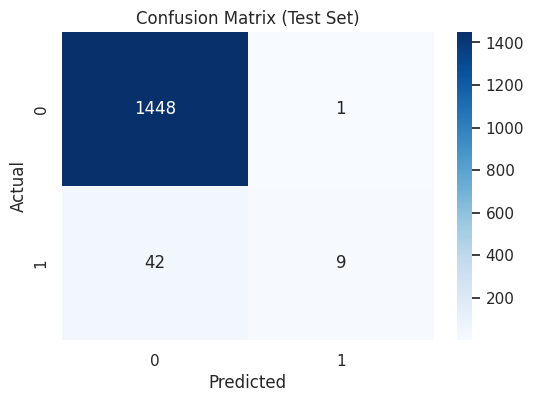

In [17]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 6. Insights & Conclusion
### Model Performance
The Logistic Regression model achieved the following results:

**Training Set:**
- Accuracy: 97.11%
- Precision: 87.23%
- Recall: 17.30%
- F1 Score: 28.87%

**Validation Set:**
- Accuracy: 97.00%
- Precision: 87.50%
- Recall: 13.73%
- F1 Score: 23.73%

**Test Set:**
- Accuracy: 97.13%
- Precision: 90.00%
- Recall: 17.65%
- F1 Score: 29.51%

**Interpretation:**
- The model shows high accuracy and precision, meaning when it predicts a failure, it's usually correct
- However, recall (how many failures did the model catch) is low, indicating the model is conservative(obviously not the party) in predicting failures
- The confusion matrix shows the model correctly identifies most non-failure cases but misses a significant portion of actual failures

### Key Findings from Data Analysis
1.  **Product Quality & Failure Risk**:
    *   **Low-quality (L) variants** have the highest failure rate at **3.92%**, compared to 2.77% for Medium and 2.09% for High quality
    *   Manufacturing processes for 'L' grade products require tighter quality control
2.  **Operational Stressors (Torque & Tool Wear)**:
    *   Machines that failed had average **Torque of 50.17 Nm** (vs. 39.63 Nm for non-failures) and **Tool Wear of 143.78 um** (vs. 106.69 um)
    *   **Critical Threshold**: When both Torque (>46.8 Nm) and Tool Wear (>162 um) are high, failure rate reaches **19.03%** (~8x higher than baseline)
3.  **Temperature Patterns**:
    *   Process Temperature is slightly higher in failure cases (330 K vs 329 K), likely indicating friction/torque effects
### Strategic Recommendations
1.  **Predictive Maintenance Protocol**:
    *   Implement monitoring when **Tool Wear exceeds 140 minutes**, especially with Torque above 45 Nm
    *   This threshold-based approach can complement model predictions
2.  **Quality Assurance Focus**:
    *   Prioritize inspection and monitoring for 'L' type products
    *   Consider upgraded tooling for lower-grade products to reduce downtime
3.  **Model Application**:
    *   Use model predictions with high confidence (high precision) to schedule proactive maintenance
    *   Combine model outputs with domain-based rules for Tool Wear and Torque limits